In [ ]:
import tkinter as tk
from tkinter import filedialog
from google.colab import files

file_csv = files.upload()


Saving mlr_dat.csv to mlr_dat (2).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class LinearRegression:
    def __init__(self,X,Y):
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])

    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J

    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history


    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage

    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100

    def returnTheta(self):
        return self.theta

    def returnX(self):
        return self.X

    def returnY(self):
        return self.Y


In [ ]:
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}

    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()

    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])

    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed

    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])

    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed

    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])

    def returnX(self):
        return self.X

    def returnY(self):
        return self.y



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  as lr# Menggunakan modul LinearRegression dari scikit-learn

# Baca data dari file CSV
data = pd.read_csv('mlr_dat.csv')
print(data)


    Interest_Rate  Unemployment_Rate  Stock_Index_Price
0            2.75                5.3               1464
1            2.50                5.3               1394
2            2.50                5.3               1357
3            2.50                5.3               1293
4            2.50                5.4               1256
5            2.50                5.6               1254
6            2.50                5.5               1234
7            2.25                5.5               1195
8            2.25                5.5               1159
9            2.25                5.6               1167
10           2.00                5.7               1130
11           2.00                5.9               1075
12           2.00                6.0               1047
13           1.75                5.9                965
14           1.75                5.8                943
15           1.75                6.1                958
16           1.75                6.2            

In [ ]:
data.describe()

,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


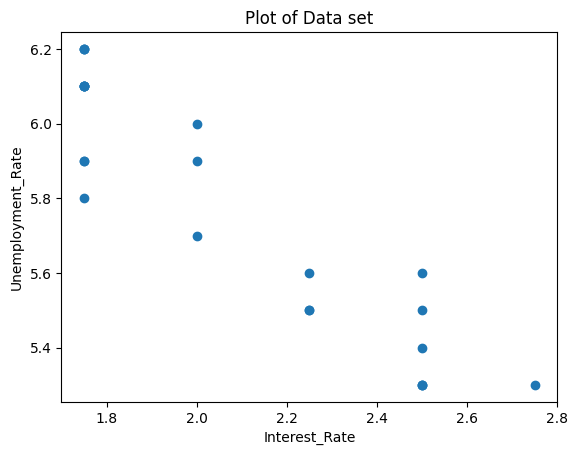

In [ ]:
#plot of dataset
plt.scatter(data.iloc[:,0:1].values,data.iloc[:,1].values)
plt.xlabel('Interest_Rate')
plt.ylabel('Unemployment_Rate')
plt.title('Plot of Data set')
plt.show()

In [ ]:
#training and testing size
train_size=int(0.7* data.shape[0])
test_size=int(0.3* data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 16
Testing set size : 7


In [ ]:
#shuffle the dataset
Data = data.sample(frac=1)
X= Data.iloc[:,0:1].values
y= Data.iloc[:,1].values

#training set split
X_train=X[0:train_size,:]
Y_train=y[0:train_size]

print(X_train.shape)
print(Y_train.shape)

#testing set split
X_test=X[train_size:,:]
Y_test=y[train_size:]

(16, 1)
(16,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Menggabungkan kedua fitur X1 dan X2
X = np.column_stack((X1, X2))

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model MLR
model = LinearRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Mengevaluasi model menggunakan data uji
score = model.score(X_test, y_test)
print("Coefficient of determination (R^2) on test set:", score)

# Prediksi Stock Price Index untuk data uji
predictions = model.predict(X_test)
print("Predictions:", predictions)


Coefficient of determination (R^2) on test set: 0.8267238836293073
Predictions: [1209.23756226  824.86266719 1398.75068554  863.83502155  997.56393755]


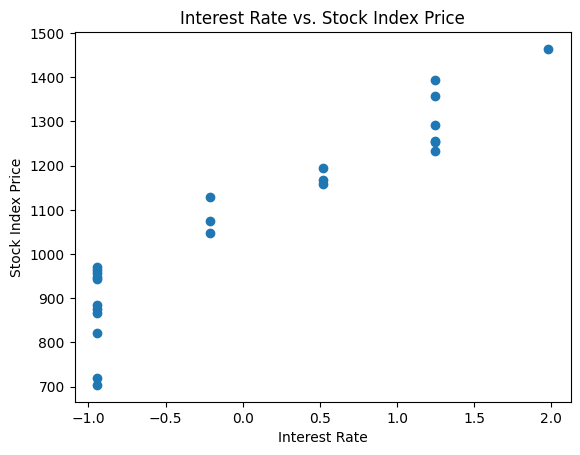

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot untuk Interest Rate vs. Stock Index Price
plt.scatter(X1, y)
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.title('Interest Rate vs. Stock Index Price')
plt.show()

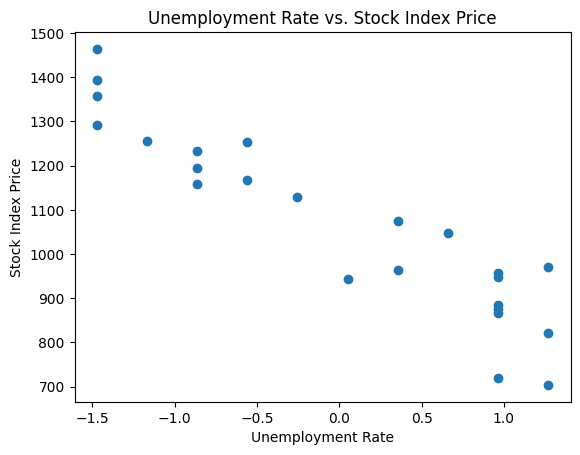

In [ ]:
# Scatter plot untuk Unemployment Rate vs. Stock Index Price
plt.scatter(X2, y)
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index Price')
plt.title('Unemployment Rate vs. Stock Index Price')
plt.show()


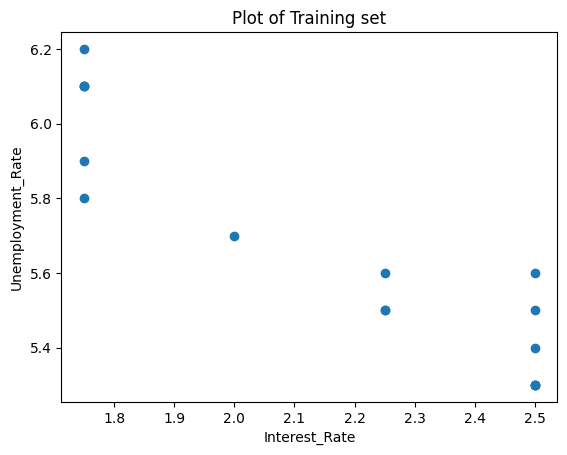

In [ ]:
#scatter plot of training set
plt.scatter(X_train,Y_train)
plt.xlabel('Interest_Rate')
plt.ylabel('Unemployment_Rate')
plt.title('Plot of Training set')
plt.show()

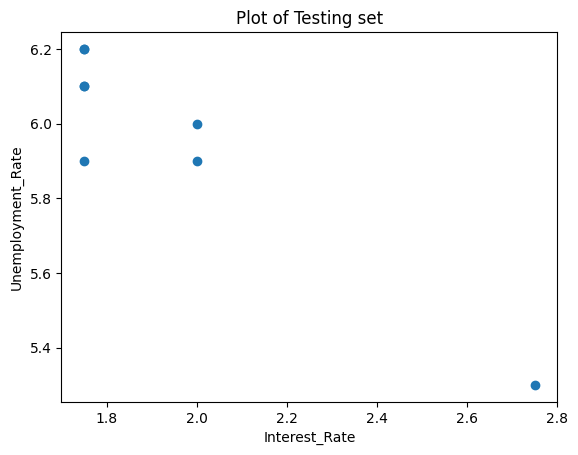

In [ ]:
#scatter plot of testing set
plt.scatter(X_test,Y_test)
plt.xlabel('Interest_Rate')
plt.ylabel('Unemployment_Rate')
plt.title('Plot of Testing set')
plt.show()

Train MSE: 3903.9005216325827
Test MSE: 6908.07517284161


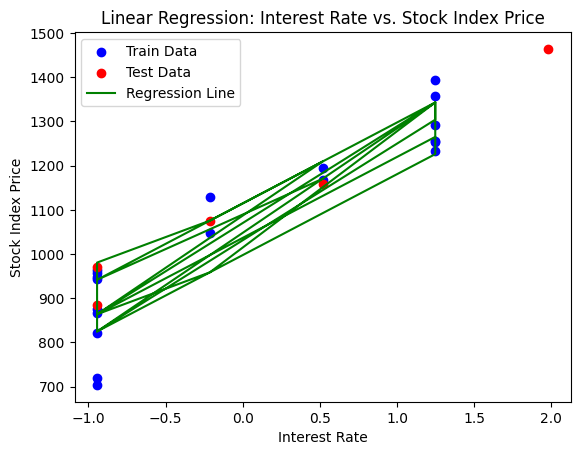

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Plot data dan garis regresi
plt.scatter(X_train[:, 0], y_train, color='blue', label='Train Data')
plt.scatter(X_test[:, 0], y_test, color='red', label='Test Data')
plt.plot(X_train[:, 0], model.predict(X_train), color='green', label='Regression Line')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.title('Linear Regression: Interest Rate vs. Stock Index Price')
plt.legend()
plt.show()

# Plot cost history
cost_history = []  # Simpan nilai cost pada setiap iterasi

# Definisikan hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Inisialisasi parameter theta secara acak
theta = np.random.rand(X_train.shape[1])

# Implementasi Gradient Descent
for i in range(num_iterations):
    # Hitung prediksi
    predictions = np.dot(X_train, theta)

    # Hitung error
    error = predictions - y_train

    # Hitung cost (MSE)
    cost = np.mean(error ** 2)

    # Simpan cost pada setiap iterasi
    cost_history.append(cost)

    # Hitung gradient
    gradient = 2 * np.dot(X_train.T, error) / X_train.shape[0]

    # Update parameter theta
    theta -= learning_rate * gradient



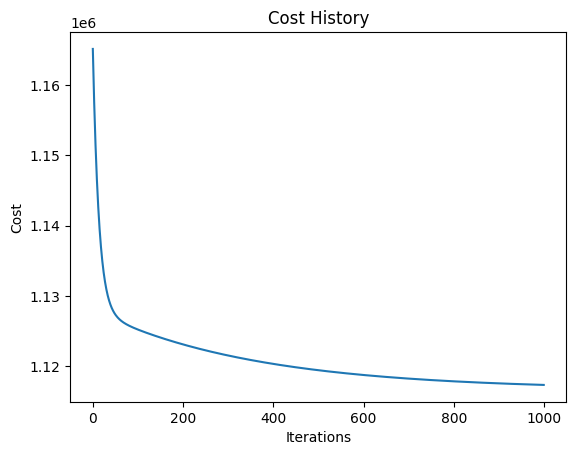

In [ ]:
# Plot cost history
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

Intercept: 1059.3020780868171
Coefficient for Interest Rate: 76.35029978146684
Coefficient for Unemployment Rate: -128.1091627823653


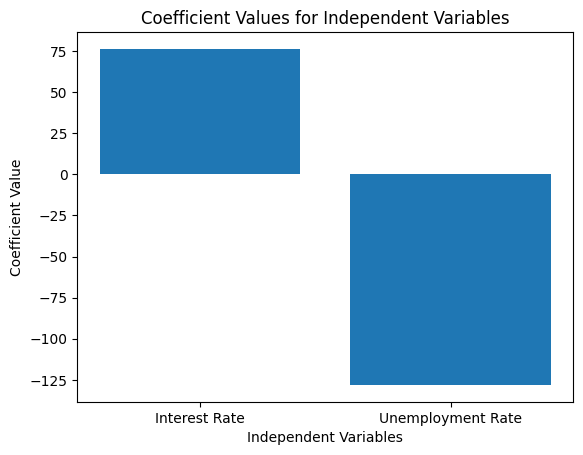

In [ ]:
import matplotlib.pyplot as plt

# Koefisien model MLR
print("Intercept:", model.intercept_)
print("Coefficient for Interest Rate:", model.coef_[0])
print("Coefficient for Unemployment Rate:", model.coef_[1])

# Variabel independen
independent_variables = ['Interest Rate', 'Unemployment Rate']

# Koefisien model MLR
coefficients = model.coef_

# Plot koefisien
plt.bar(independent_variables, coefficients)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values for Independent Variables')
plt.show()


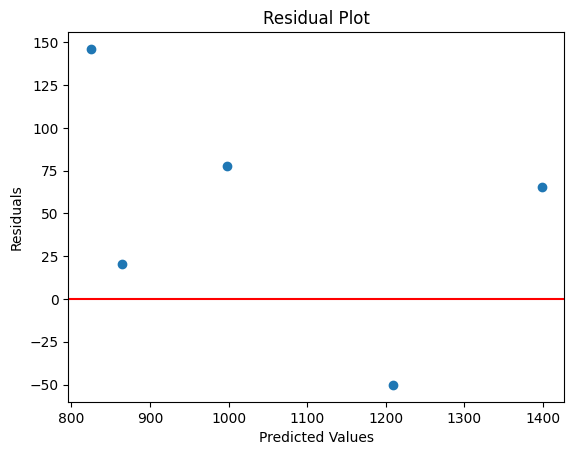

In [ ]:
# Menghitung residual
residuals = y_test - predictions

# Scatter plot residual vs. predicted values
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')  # Garis referensi untuk residual nol
plt.show()


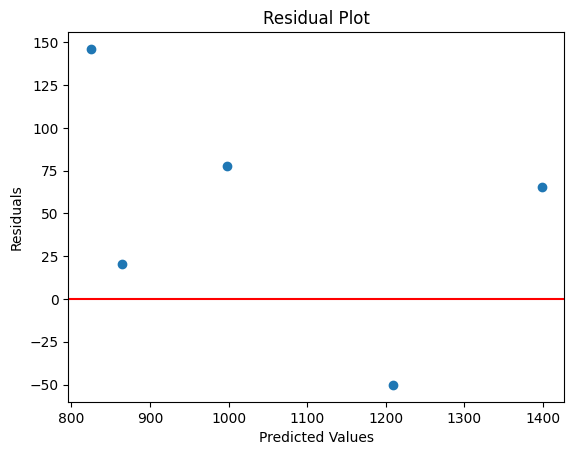

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Menghitung residual
residuals = y_test - predictions

# Scatter plot residual vs. predicted values
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')  # Garis referensi untuk residual nol
plt.show()


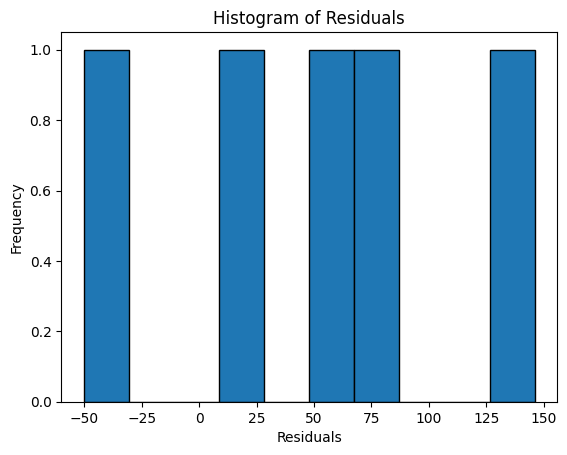

In [ ]:
# Histogram residual untuk mengecek normalitas
plt.hist(residuals, bins=10, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

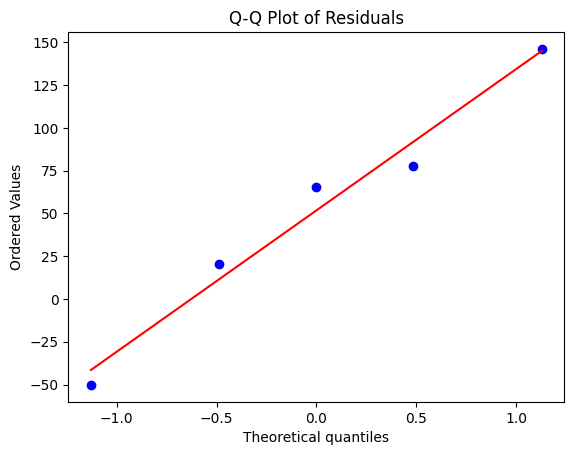

In [ ]:
# Plot Q-Q untuk mengecek normalitas
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


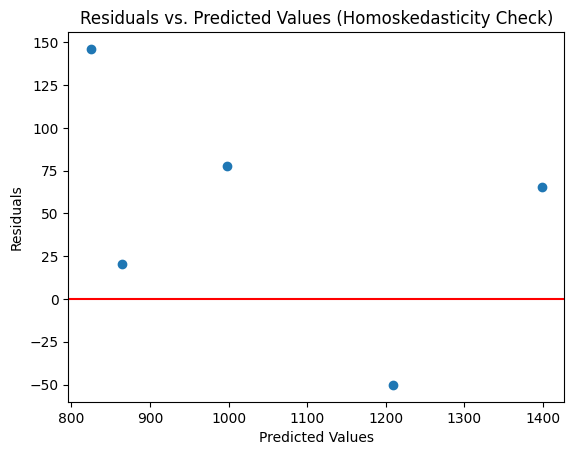

In [ ]:
# Scatter plot residual vs. predicted values untuk mengecek homoskedastisitas
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Homoskedasticity Check)')
plt.axhline(y=0, color='r', linestyle='-')  # Garis referensi untuk residual nol
plt.show()


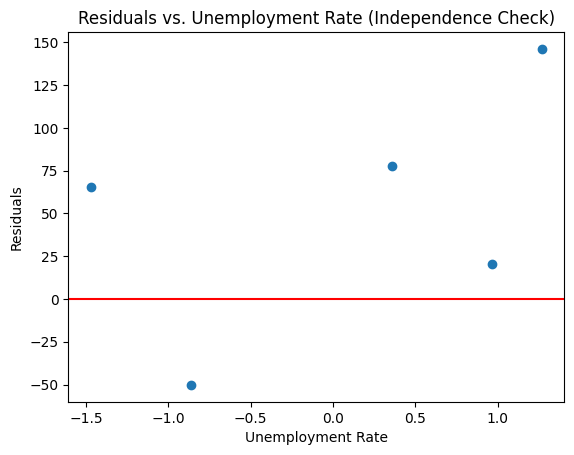

In [ ]:
# Scatter plot residual vs. Unemployment Rate untuk mengecek independensi
plt.scatter(X_test[:, 1], residuals)
plt.xlabel('Unemployment Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs. Unemployment Rate (Independence Check)')
plt.axhline(y=0, color='r', linestyle='-')  # Garis referensi untuk residual nol
plt.show()


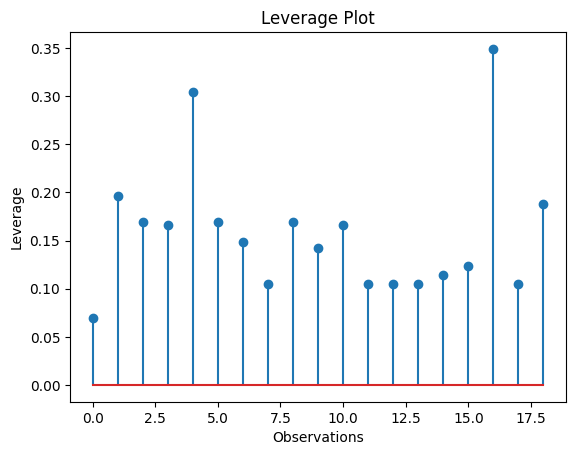

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.regression.linear_model import OLS

# Membuat model OLS dari statsmodels
X_train_with_intercept = np.column_stack((np.ones_like(X_train[:,0]), X_train))
ols_model = OLS(y_train, X_train_with_intercept).fit()

# Menghitung leverage
influence = OLSInfluence(ols_model)
leverage = influence.hat_matrix_diag

# Plot leverage
plt.stem(leverage)
plt.xlabel('Observations')
plt.ylabel('Leverage')
plt.title('Leverage Plot')
plt.show()


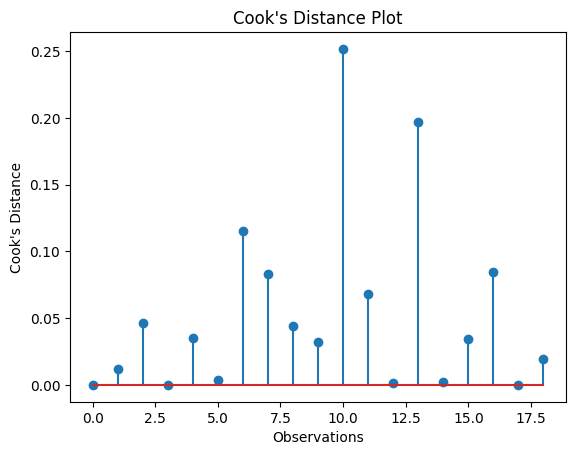

In [ ]:
# Membuat model OLS dari statsmodels
X_train_with_intercept = np.column_stack((np.ones_like(X_train[:,0]), X_train))
ols_model = OLS(y_train, X_train_with_intercept).fit()

# Menghitung leverage dan Cook's distance
influence = OLSInfluence(ols_model)
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]

# Plot Cook's distance
plt.stem(cooks_distance)
plt.xlabel('Observations')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan fit_transform pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan transform pada data uji
X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan fit_transform pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan transform pada data uji
X_test_scaled = scaler.transform(X_test)


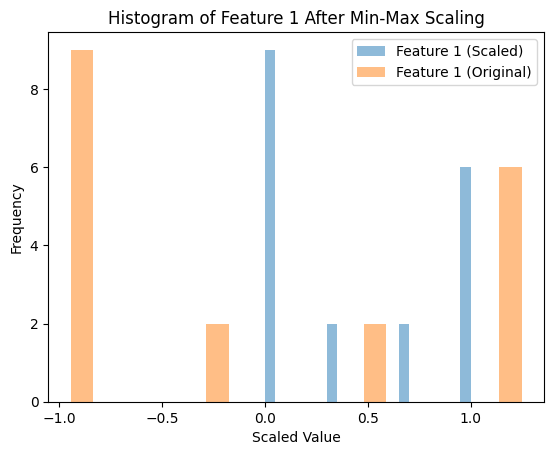

In [ ]:
import matplotlib.pyplot as plt

# Histogram dari fitur pertama setelah discaling
plt.hist(X_train_scaled[:, 0], bins=20, alpha=0.5, label='Feature 1 (Scaled)')
plt.hist(X_train[:, 0], bins=20, alpha=0.5, label='Feature 1 (Original)')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 1 After Min-Max Scaling')
plt.legend()
plt.show()

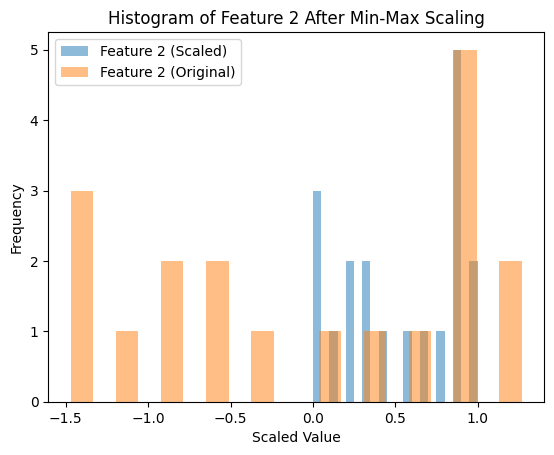

In [ ]:

# Histogram dari fitur kedua setelah discaling
plt.hist(X_train_scaled[:, 1], bins=20, alpha=0.5, label='Feature 2 (Scaled)')
plt.hist(X_train[:, 1], bins=20, alpha=0.5, label='Feature 2 (Original)')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 2 After Min-Max Scaling')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normalisasi fitur
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

# Inisialisasi parameter
theta0 = 0
theta1 = 0
theta2 = 0
learning_rate = 0.1
iterations = 1000
m = len(y)

# Fungsi hipotesis
def h(theta0, theta1, theta2, x1, x2):
    return theta0 + theta1 * x1 + theta2 * x2

# Fungsi biaya (Mean Squared Error)
def compute_cost(theta0, theta1, theta2, X1, X2, y):
    J = (1/(2*m)) * np.sum((h(theta0, theta1, theta2, X1, X2) - y)**2)
    return J

# Gradient Descent
def gradient_descent(X1, X2, y, theta0, theta1, theta2, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        temp0 = theta0 - (learning_rate/m) * np.sum(h(theta0, theta1, theta2, X1, X2) - y)
        temp1 = theta1 - (learning_rate/m) * np.sum((h(theta0, theta1, theta2, X1, X2) - y) * X1)
        temp2 = theta2 - (learning_rate/m) * np.sum((h(theta0, theta1, theta2, X1, X2) - y) * X2)
        theta0 = temp0
        theta1 = temp1
        theta2 = temp2
        cost = compute_cost(theta0, theta1, theta2, X1, X2, y)
        cost_history.append(cost)
        print(f"Iterasi {i+1}, Cost Function: {cost}")
    return theta0, theta1, theta2, cost_history

# Training model
theta0, theta1, theta2, cost_history = gradient_descent(X1, X2, y, theta0, theta1, theta2, learning_rate, iterations)

# Evaluasi model
print("Parameter terbaik: theta0 =", theta0, ", theta1 =", theta1, ", theta2 =", theta2)
print("Cost terendah:", cost_history[-1])


# Prediksi Stock_Index_Price untuk data

Iterasi 1, Cost Function: 478342.1853839784
Iterasi 2, Cost Function: 385873.04147736554
Iterasi 3, Cost Function: 311667.12741165847
Iterasi 4, Cost Function: 252011.93092051405
Iterasi 5, Cost Function: 203985.03878357052
Iterasi 6, Cost Function: 165274.41880513995
Iterasi 7, Cost Function: 134043.18928205394
Iterasi 8, Cost Function: 108826.81048271019
Iterasi 9, Cost Function: 88454.18732231928
Iterasi 10, Cost Function: 71986.61071414966
Iterasi 11, Cost Function: 58670.15317898189
Iterasi 12, Cost Function: 47898.314981464704
Iterasi 13, Cost Function: 39182.55196074117
Iterasi 14, Cost Function: 32128.913466801554
Iterasi 15, Cost Function: 26419.451166425046
Iterasi 16, Cost Function: 21797.376235666266
Iterasi 17, Cost Function: 18055.177260735985
Iterasi 18, Cost Function: 15025.087200043945
Iterasi 19, Cost Function: 12571.421131614854
Iterasi 20, Cost Function: 10584.408546306604
Iterasi 21, Cost Function: 8975.222696297657
Iterasi 22, Cost Function: 7671.970757376292
Iter

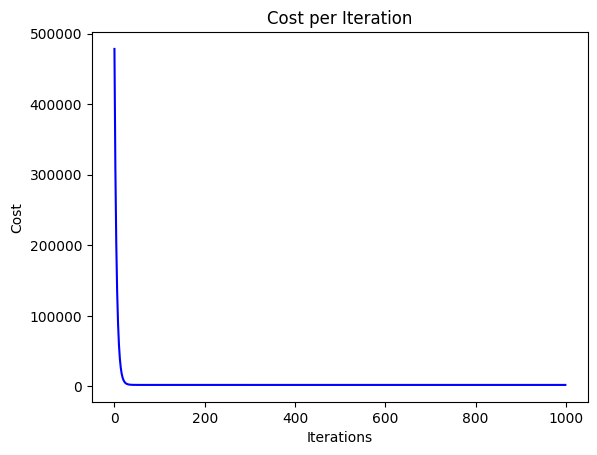

In [ ]:
# Plot cost history
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.show()

In [ ]:
import numpy as np

# Menambahkan kolom konstan untuk theta0
X_b = np.c_[np.ones((len(X1), 1)), X1, X2]

# Menghitung parameter theta menggunakan rumus OLS
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Evaluasi model
print("Parameter model (theta):", theta)

# Prediksi Stock_Index_Price untuk data baru
new_interest_rate = 2.25
new_unemployment_rate = 6.5
X_new = np.array([[1, new_interest_rate, new_unemployment_rate]])
predicted_stock_index_price = X_new.dot(theta)
print("Prediksi Stock_Index_Price untuk Interest_Rate", new_interest_rate, "dan Unemployment_Rate", new_unemployment_rate, "adalah", predicted_stock_index_price[0])


Parameter model (theta): [1070.08333333  108.03443843  -91.04197259]
Prediksi Stock_Index_Price untuk Interest_Rate 2.25 dan Unemployment_Rate 6.5 adalah 721.3879979753762


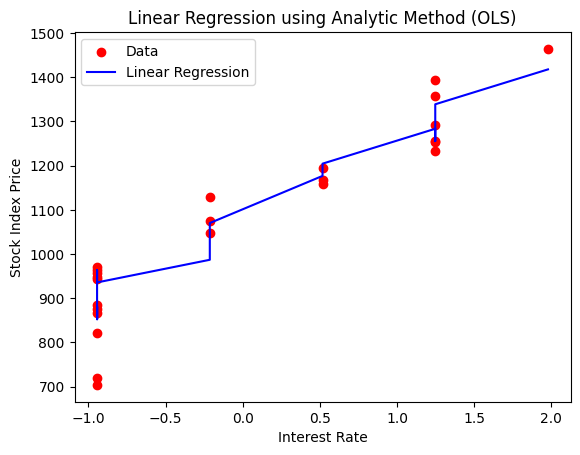

In [ ]:
import matplotlib.pyplot as plt

# Plot data dan garis regresi
plt.scatter(X1, y, color='red', label='Data')
plt.plot(X1, X_b.dot(theta), color='blue', label='Linear Regression')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.title('Linear Regression using Analytic Method (OLS)')
plt.legend()
plt.show()


Parameter model (theta): 1070.0833333333333 108.03443842851789 -91.0419725880156
Prediksi Stock_Index_Price untuk Interest_Rate 2.25 dan Unemployment_Rate 6.5 adalah 721.3879979753972


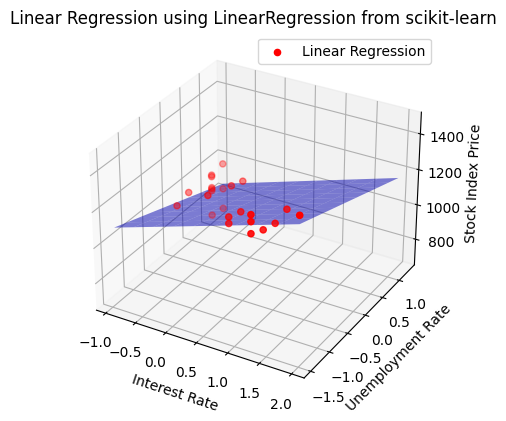

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Diperlukan untuk plot 3D

# Menggabungkan kedua fitur X1 dan X2
X = np.column_stack((X1, X2))

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data
model.fit(X, y)

# Mendapatkan koefisien (parameter) dari model
theta0 = model.intercept_
theta1, theta2 = model.coef_

# Evaluasi model
print("Parameter model (theta):", theta0, theta1, theta2)

# Prediksi Stock_Index_Price untuk data baru
new_interest_rate = 2.25
new_unemployment_rate = 6.5
X_new = np.array([[new_interest_rate, new_unemployment_rate]])
predicted_stock_index_price = model.predict(X_new)
print("Prediksi Stock_Index_Price untuk Interest_Rate", new_interest_rate, "dan Unemployment_Rate", new_unemployment_rate, "adalah", predicted_stock_index_price[0])

# Plot data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='red', label='Data')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Unemployment Rate')
ax.set_zlabel('Stock Index Price')

# Buat bidang regresi
x1_range = np.linspace(min(X1), max(X1), 10)
x2_range = np.linspace(min(X2), max(X2), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred = model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
y_pred = y_pred.reshape(x1_mesh.shape)
ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5, color='blue')

plt.title('Linear Regression using LinearRegression from scikit-learn')
plt.legend(['Linear Regression'])
plt.show()
